<a href="https://colab.research.google.com/github/delaneybrown23/visualization/blob/main/DelaneyBrownassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [6]:
# Q1 - Parts 1-3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('college_completion.csv') # uploaded file to Colab
print(df.shape,'\n')
print(df.head(),'\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

# The dimensions of the data are 3798 by 63.
# There are 239,274 observations.
# Some of the variables included are index, unitid, chronname, city, state, level, control, several variables related to transfering, and more.

pd.crosstab(df['control'], df['level'])

# The most commonly occuring institutions in this dataset are 4-year private-not-for-profit, followed by 2-year public, 4-year public, 4-year private-for-profit, and 2-year private-for-profit. There is a very low amount of 2-year private not-for-profit schools.


(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: >

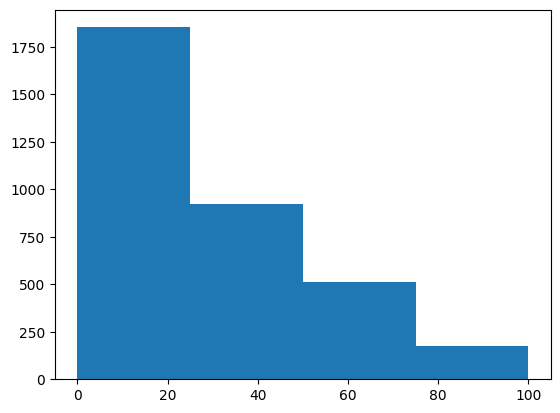

In [11]:
# Q1 - Part 4
# Histogram
df['grad_100_value'].hist(bins=4,grid=False)

<Axes: ylabel='Density'>

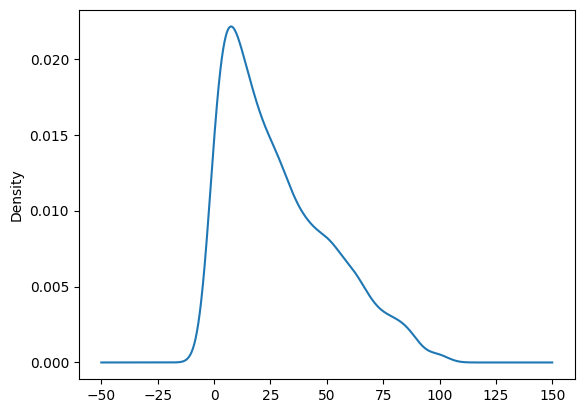

In [12]:
# Q1 - Part 4
# Kernel Density Plot
df['grad_100_value'].plot.density()

<Axes: >

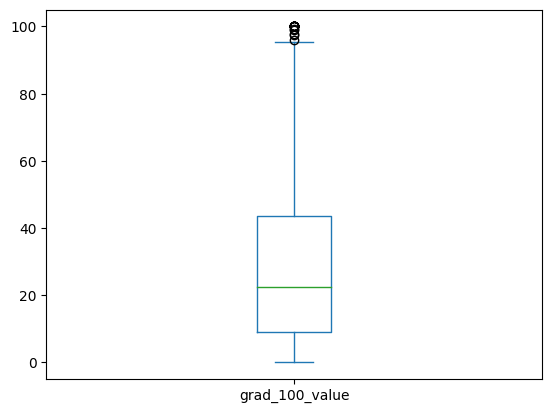

In [14]:
# Q1 - Part 4
# Boxplot
df['grad_100_value'].plot.box()

In [15]:
# Q1 - Part 4
# Statistical Description
descr = df['grad_100_value'].describe()
print(descr,'\n')

std = descr[2]
var = std**2
print('Variance: ', var,'\n')

thirdQ = descr[6]
firstQ = descr[4]
IQR = thirdQ - firstQ
print('IQR: ', IQR)

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64 

Variance:  543.483382020338 

IQR:  34.650000000000006


<ipython-input-15-3e569d3e1262>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  std = descr[2]
<ipython-input-15-3e569d3e1262>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  thirdQ = descr[6]
<ipython-input-15-3e569d3e1262>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  firstQ = descr[4]


grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

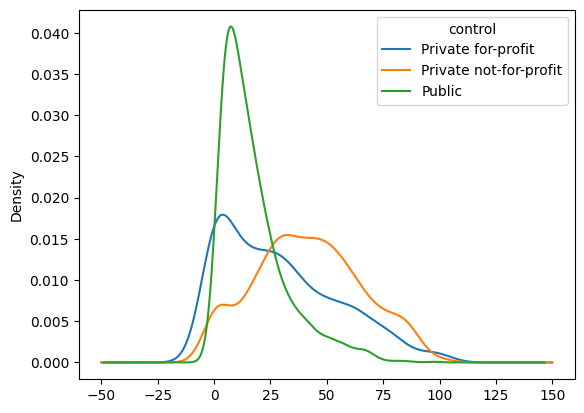

In [19]:
# # Q1 - Part 5
# Grouped Kernel Density Plot
group_by = 'control'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

# From this plot, I can see that public institutions have the highest spike in density between the 0 and about 40, meaning that there are less students who complete their degree in the expected time. Private not-for-profit and private-for-profit institutions have less of a spike and have more varied density across percentages from 0 to 100, meaning there are more students who complete their degree in the expected time.

group = 'control'
df.loc[:,[group,var]].groupby(group).describe()

# Private not-for-profit institutions seem to have the best graduation rate, with the highest mean graduation rate of about 42%.

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

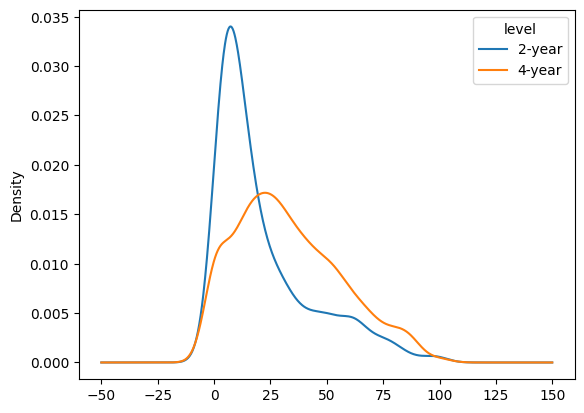

In [20]:
# Q1 - Part 5
# Grouped Kernel Density Plot
group_by = 'level'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

# From this plot, I see that 2-year institutions have a spike in the 0 to 45 percentage range of completing degrees in time, whereas the 4-year institutions have more of a varied spread across percentages, with more students graduating on time.

group = 'level'
df.loc[:,[group,var]].groupby(group).describe()

# 4-year institutions seem to have the best graduation rate, with the higher mean of about 33%.

<Axes: ylabel='Density'>

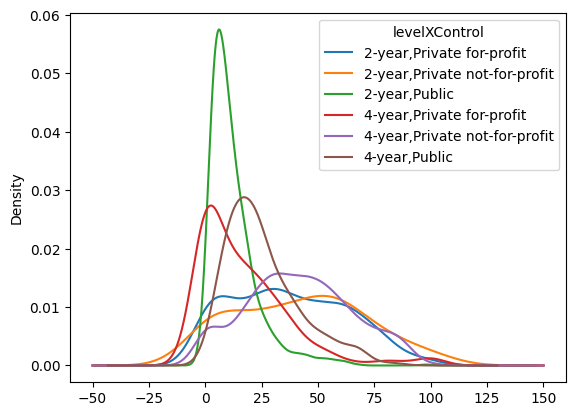

In [21]:
# Q1 - Part 6
# Grouped Kernel Density Plot
df['levelXControl']=df['level']+','+df['control']
group_by = 'levelXControl'
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

# The institutions that appear to have the best graduation rates are 4-year private-not-for-profit, 2-year private-for-profit, and 2-year private-not-for-profit.

aid_value                                     \
                                  count          mean          std     min   
levelXControl                                                                
2-year,Private for-profit         464.0   4559.681034  1286.688269   294.0   
2-year,Private not-for-profit      68.0   5128.058824  2590.449946   934.0   
2-year,Public                     926.0   4126.199784  1260.271382   881.0   
4-year,Private for-profit         527.0   4696.062619  1489.410020  1580.0   
4-year,Private not-for-profit    1180.0  14702.401695  7649.775203   902.0   
4-year,Public                     632.0   6514.071203  2353.716693  2232.0   

                                                                    
                                   25%      50%       75%      max  
levelXControl                                                       
2-year,Private for-profit      3818.75   4286.5   5122.00   9727.0  
2-year,Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
2-year,Public                  3311.25   3943.5   4762.00   9809.0  
4-year,Private for-profit      3885.50   4364.0   5131.50  18355.0  
4-year,Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
4-year,Public                  4990.50   6085.0   7341.50  17299.0

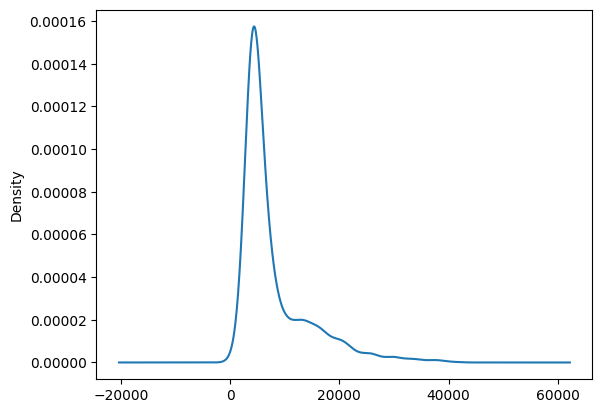

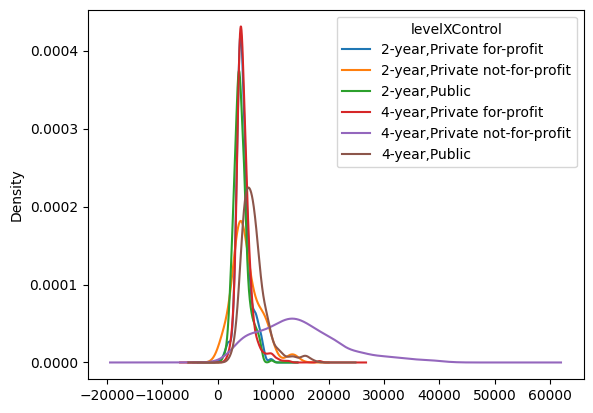

In [24]:
# Q1 - Part 7
# Kernel Density Plot
df['aid_value'].plot.density()

# Grouped Kernel Density Plot
df['levelXControl']=df['level']+','+df['control']
group_by = 'levelXControl'
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

# The shape of the graph, or the spike by almost all institutions between 0 and 10,000 in financial aid, can be explained by institutions having similar financial aid policies.

# Grouped Calculations of Statistical Descriptions
group = 'levelXControl'
df.loc[:,[group,var]].groupby(group).describe()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U1')) -> None

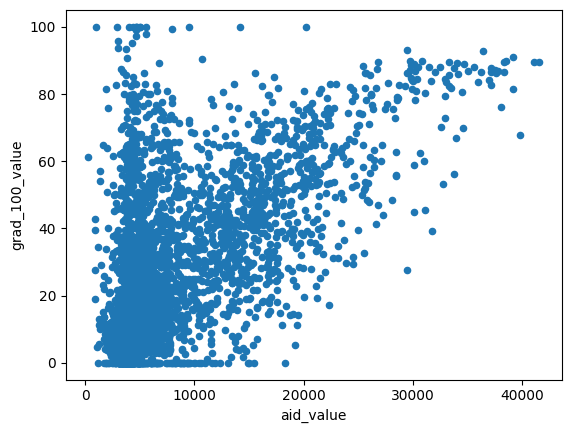

In [31]:
# Q1 - Part 8
# Scatter Plot

df.plot.scatter(y='grad_100_value',x='aid_value')

# From this plot, I can see that students who were given more financial aid were more likely to graduate in their expected timeframe.

# Grouping by level and control - struggling to figure this out.

df['aid_valueXgrad_100']=df['aid_value']+','+df['grad_100_value']
group_by = 'level'
var = 'aid_valueXgrad_100'

df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.scatter(group_by,y='grad_100_value',x='aid_value')


**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [ ]:
# Q4

# Part 1 - I picked the "Medicare Telehealth Trends" dataset (https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-service-type-reports/medicare-telehealth-trends).

# Part 2
# The data dictionary does not document how missings are handled overall. However, for categorical variables such as "Bene_Geo_Desc," which indicates beneficiaries' geographic locations, the dictionary does indicate that if this is an unknown item, the individual will be classified under "Missing Data." For numeric variables, the dictionary does not describe how missing values are handled.
# Overall, the data dictionary does a great job of describing the potential possible values for categorical variables, giving viewers a good idea of what to expect. It seems that the only variable for which they had missing data was geographic locations, which is where they indicated a potential for individuals to be classified under "Missing Data."

In [43]:
# Q4 - Part 3

# The variables that I find interesting are "Bene_Geo_Desc," which indicates their geographic location, "Bene_Mdcr_Entlmt_Stus," which indicates medicare entitlement status, and "Total_Bene_Telehealth," which indicates total telehealth users.
# I think it will be interesting to see how these variables interact, particularly with examining differences among states, as well as the proportion of those eligible for medicare who choose to use telehealth. It will be interesting to visualize the popularity of telehealth in different geographic areas.

# Cleaning
df = pd.read_csv('TMEDTREND_PUBLIC_240821.csv')
print(df.dtypes, '\n')

# Cleaning geographic variable
var = 'Bene_Geo_Desc'
print(df[var].unique(), '\n')
df[var] = df[var].replace('Missing Data',np.nan)
print(df[var].value_counts(), '\n')
# In cleaning this variable, I chose to replace the missing values with nan values.

# Cleaning total telehealth users variable
print('Before coercion: \n', df['Total_Bene_Telehealth'].describe(), '\n')
df['Total_Bene_Telehealth'] = pd.to_numeric(df['Total_Bene_Telehealth'], errors='coerce')
df['telehealth_nan'] = df['Total_Bene_Telehealth'].isnull()
print('After coercion: \n', df['Total_Bene_Telehealth'].describe(), '\n')
print('Total Missings: \n', sum(df['telehealth_nan']), '\n')
# In cleaning this variable, I chose to coerce this variable to be completely numeric and to replace missing values with nans.
# It looks like all the variables were already numeric, but that there are 2723 missing values.

Year                          int64
quarter                      object
Bene_Geo_Desc                object
Bene_Mdcd_Mdcr_Enrl_Stus     object
Bene_Race_Desc               object
Bene_Sex_Desc                object
Bene_Mdcr_Entlmt_Stus        object
Bene_Age_Desc                object
Bene_RUCA_Desc               object
Total_Bene_TH_Elig          float64
Total_PartB_Enrl            float64
Total_Bene_Telehealth       float64
Pct_Telehealth              float64
dtype: object 

['National' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District Of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Missing Data' 'Mississippi' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'Sou

<Axes: >

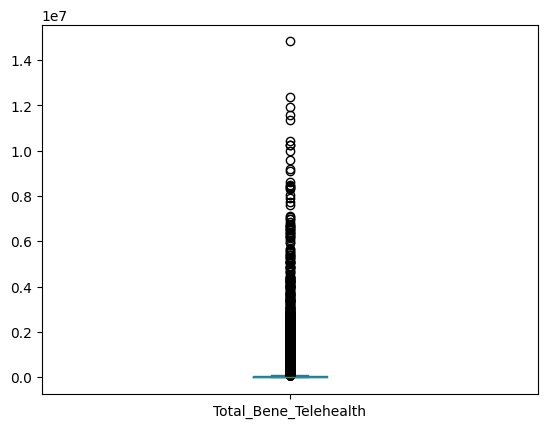

In [53]:
# Q4 - Part 4

# Boxplot for telehealth users variable
df['Total_Bene_Telehealth'].plot.box()
# There is an outlier at approximately 1.5


<Axes: >

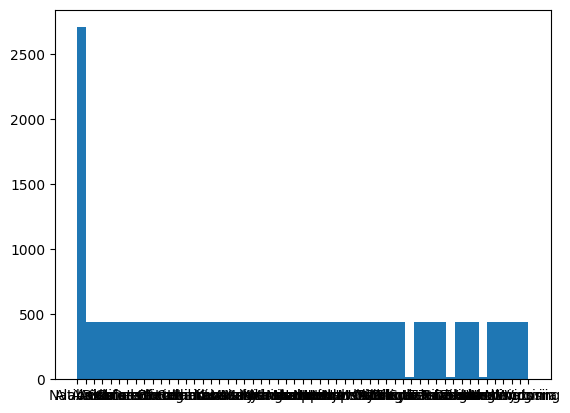

In [51]:
# Q4 - Part 4

# Bar graph for geographic description variable
df['Bene_Geo_Desc'].hist(bins=55,grid=False)
# Outlier seen all the way to the left.

<Axes: >

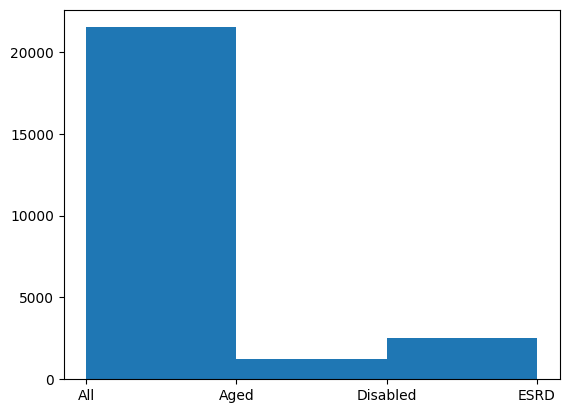

In [52]:
# Q4 - Part 4

# Bar graph for medicare entitlement
df['Bene_Mdcr_Entlmt_Stus'].hist(bins=3,grid=False)
# There really isn't an outlier, but there is a higher number of individuals with ESRD, or end stage renal disease, according to the data dictionary.


<Axes: ylabel='Density'>

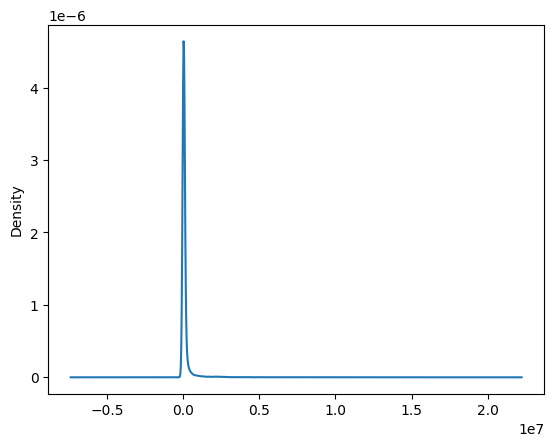

In [57]:
# Q4 - Part 5
# Kernel Density Plot
var = 'Total_Bene_Telehealth'
df[var].plot.density()
# I see a spike in density at 0.0.

<Axes: xlabel='Bene_Mdcr_Entlmt_Stus', ylabel='Total_Bene_Telehealth'>

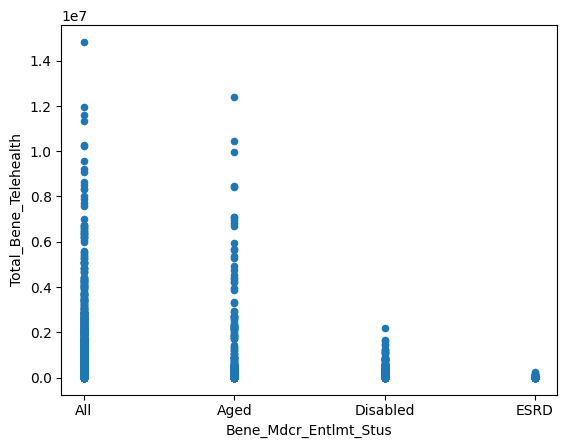

In [58]:
# Q4 - Part 6
# Scatter plot

df.plot.scatter(y='Total_Bene_Telehealth', x='Bene_Mdcr_Entlmt_Stus')
# I can see that those in the Aged category use telehealth services the most.

In [61]:
# Q4 - Part 7

var = 'Total_Bene_Telehealth'
group = 'Bene_Geo_Desc'

df.loc[:,[group,var]].groupby(group).describe()

# From this, I can see that California has the highest average number of telehealth users, followed closely by Florida, New York, and Texas.

Total_Bene_Telehealth                               \
                                     count           mean           std   
Bene_Geo_Desc                                                             
Alabama                              398.0   20835.045226  2.910741e+04   
Alaska                               399.0    5582.967419  5.985487e+03   
Arizona                              399.0   45903.664160  5.778998e+04   
Arkansas                             399.0   18550.175439  2.336329e+04   
California                           399.0  279528.345865  2.873064e+05   
Colorado                             399.0   25874.275689  3.072435e+04   
Connecticut                          399.0   23213.383459  2.880364e+04   
Delaware                             391.0   13160.148338  1.560483e+04   
District Of Columbia                 360.0    5193.186111  5.318615e+03   
Florida                              399.0  130541.318296  1.680495e+05   
Georgia                              399.0   42282.015038  5.262270e+04   
Hawaii                               398.0    8563.814070  9.282135e+03   
Idaho                                399.0    7104.446115  9.238667e+03   
Illinois                             399.0   73127.481203  9.106930e+04   
Indiana                              399.0   33711.228070  4.655122e+04   
Iowa                                 399.0   15207.105263  2.119735e+04   
Kansas                               399.0   14302.927318  1.763287e+04   
Kentucky                             393.0   25500.562341  3.358295e+04   
Louisiana                            399.0   18205.516291  2.514551e+04   
Maine                                399.0    9199.656642  1.134627e+04   
Maryland                             399.0   61374.521303  7.273930e+04   
Massachusetts                        399.0   87021.295739  1.013597e+05   
Michigan                             399.0   59766.112782  6.910117e+04   
Minnesota                            399.0   29313.486216  3.362869e+04   
Mississippi                          399.0   17103.892231  2.392278e+04   
Missouri                             399.0   24783.313283  3.185427e+04   
Montana                              399.0    5910.000000  7.396017e+03   
National                            2226.0  795259.081312  1.483360e+06   
Nebraska                             399.0    7877.749373  1.006136e+04   
Nevada                               399.0   15241.997494  1.740207e+04   
New Hampshire                        394.0   14257.038071  1.713663e+04   
New Jersey                           399.0   70831.656642  8.747667e+04   
New Mexico                           399.0   14959.551378  1.692710e+04   
New York                             399.0  135320.511278  1.478776e+05   
North Carolina                       399.0   54399.681704  6.771246e+04   
North Dakota                         399.0    2740.195489  3.409739e+03   
Ohio                                 399.0   58395.583960  7.657146e+04   
Oklahoma                             399.0   23114.157895  2.862485e+04   
Oregon                               399.0   24747.596491  2.884368e+04   
Pennsylvania                         399.0   79642.548872  1.026353e+05   
Puerto Rico                           21.0    4894.285714  3.659399e+03   
Rhode Island                         395.0    7855.820253  1.033295e+04   
South Carolina                       399.0   29403.561404  3.884090e+04   
South Dakota                         399.0    4101.987469  5.652116e+03   
Tennessee                            399.0   25129.849624  3.163677e+04   
Territories                           21.0     584.666667  4.254203e+02   
Texas                                399.0  132473.749373  1.581577e+05   
Utah                                 399.0    9668.253133  1.270978e+04   
Vermont                              393.0    7742.218830  9.523610e+03   
Virgin Islands                        21.0    1215.142857  1.032107e+03   
Virginia                             399.0   5